In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import missingno as msno
import pdb

In [2]:
king_county = pd.read_csv('./data/EXTR_RPSale.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_KC = pd.DataFrame(king_county)

In [4]:
sales_price_dict = dict(df_KC.SalePrice.value_counts())
total = 0
for key, val in sales_price_dict.items():
    if key != 0:
        total += val
print("Total number of Sales Price > $0 = {}".format(total))
print("Total number of Sales Price = $0 = {}".format(sales_price_dict[0]))
print("Percentage of missing values = {}".format(sales_price_dict[0]/total))

Total number of Sales Price > $0 = 1337800
Total number of Sales Price = $0 = 706282
Percentage of missing values = 0.5279428913140978


In [23]:
cols = ['ExciseTaxNbr', 'Major', 'Minor']
df_KC['ID'] = df_KC[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [26]:
df_KC.shape

(2000164, 14)

In [32]:
for column in df_KC.columns:
    print("{}:{}".format(column, df_KC[column].value_counts().sum()))

ExciseTaxNbr:2000164
Major:2000164
Minor:2000164
DocumentDate:2000164
SalePrice:2000164
RecordingNbr:2000164
SellerName:2000164
BuyerName:2000164
PropertyType:2000164
PrincipalUse:2000164
SaleInstrument:2000164
SaleReason:2000164
PropertyClass:2000164
ID:2000164


In [5]:
# stripping all cells with leading or trailing spaces
df_KC = df_KC.applymap(lambda x: x.strip() if type(x) == str else x)

In [6]:
# replacing empty strings with nan values 
df_KC = df_KC.replace(to_replace='', value=np.nan)

We can go ahead and drop all rows from a column with < 550 NA's because we have ~1.9 mil values.

In [7]:
# dropping all rows with na values in any of the columns listed below.
df_KC = df_KC.dropna(axis=0,subset=['RecordingNbr', 'Major','Minor','SellerName','BuyerName'])

After analysis of the data, we concluded that we should not replace the NA's of columns that have 70% of it's data missing. We are going to drop those columns.

In [8]:
# drops the columns from the list below
drop_columns = ['Volume','Page','PlatNbr','PlatType','PlatLot','PlatBlock','SaleWarning','AFForestLand','AFCurrentUseLand','AFNonProfitUse', 'AFHistoricProperty']
df_KC = df_KC.drop(axis=1,columns=drop_columns)

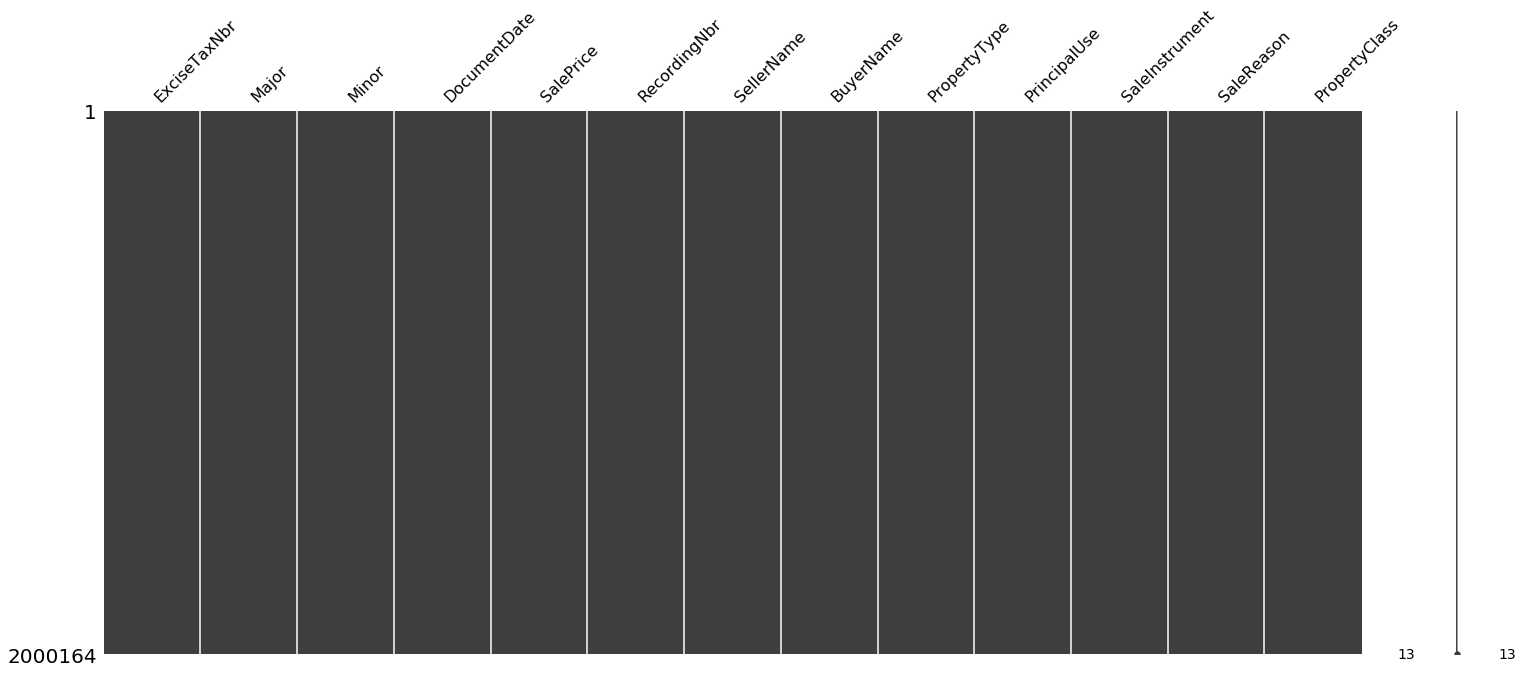

In [9]:
msno.matrix(df_KC)

In [10]:
df_KC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000164 entries, 0 to 2044081
Data columns (total 13 columns):
ExciseTaxNbr      int64
Major             object
Minor             object
DocumentDate      object
SalePrice         int64
RecordingNbr      object
SellerName        object
BuyerName         object
PropertyType      int64
PrincipalUse      int64
SaleInstrument    int64
SaleReason        int64
PropertyClass     int64
dtypes: int64(7), object(6)
memory usage: 213.6+ MB


In [14]:
# Creating lists of columns with similar types.
kc_int_columns = ['ExciseTaxNbr', 'Major', 'Minor', 'SalePrice', 'RecordingNbr', 'PropertyType', 'PrincipalUse', 'SaleInstrument', 'SaleReason', 'PropertyClass']
kc_str_columns = ['SellerName', 'BuyerName']

In [15]:
for column in kc_int_columns:
    df_KC[column] = df_KC[column].apply(int)

In [16]:
# convert appropriate columns to str
for column in kc_str_columns:
    df_KC[column] = df_KC[column].apply(str)

In [17]:
# convert DocumentDate column to datetime
df_KC['DocumentDate'] = pd.to_datetime(df_KC['DocumentDate'],errors='coerce')

In [18]:
df_KC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000164 entries, 0 to 2044081
Data columns (total 13 columns):
ExciseTaxNbr      int64
Major             int64
Minor             int64
DocumentDate      datetime64[ns]
SalePrice         int64
RecordingNbr      int64
SellerName        object
BuyerName         object
PropertyType      int64
PrincipalUse      int64
SaleInstrument    int64
SaleReason        int64
PropertyClass     int64
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 213.6+ MB


In [19]:
df_KC.isnull().sum()

ExciseTaxNbr      0
Major             0
Minor             0
DocumentDate      0
SalePrice         0
RecordingNbr      0
SellerName        0
BuyerName         0
PropertyType      0
PrincipalUse      0
SaleInstrument    0
SaleReason        0
PropertyClass     0
dtype: int64

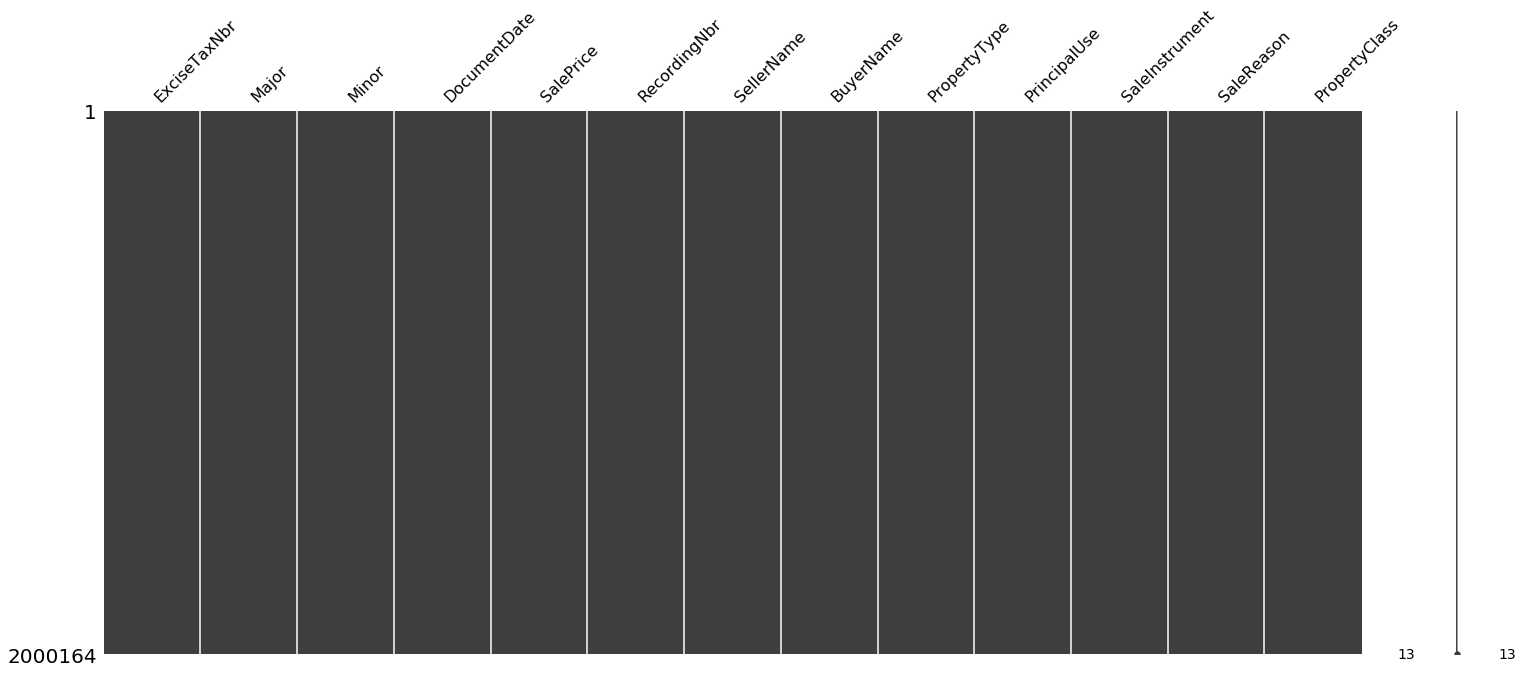

In [20]:
msno.matrix(df_KC)

In [21]:
for column in df_KC:
    print(df_KC[column].value_counts())

2639648    689
2673898    685
866727     678
2003168    267
1610536    244
          ... 
1574474      1
1576523      1
1586764      1
1588813      1
692562       1
Name: ExciseTaxNbr, Length: 1827373, dtype: int64
0         9682
375160    4756
343850    4275
276760    4191
510140    4089
          ... 
132306       1
86967        1
639001       1
172010       1
352011       1
Name: Major, Length: 16827, dtype: int64
10      37137
20      37064
30      35855
40      34974
50      33288
        ...  
3973        1
7831        1
6197        1
8903        1
3658        1
Name: Minor, Length: 7601, dtype: int64
2014-06-11    941
2013-11-05    870
2004-10-07    764
2005-12-01    763
2006-12-05    738
             ... 
1979-12-10      1
1980-01-05      1
1975-01-21      1
1983-09-03      1
1970-01-01      1
Name: DocumentDate, Length: 14356, dtype: int64
0         689791
250000      6998
300000      6793
350000      6375
200000      6307
           ...  
286070         1
273784         1
249

In [ ]:
drop_0_columns = ['PropertyClass', 'SaleReason', 'PrincipalUse','SaleInstrument','PropertyType']

property_class_replacements = {1:'C/I-Land only',
                               2:'C/I-Imp prop; no condo/MH',
                               3:'C/I-Condominium',
                               4:'C/I-Air rights only',
                               5:'C/I-Imp prop excl air rights',
                               6:'C/I-Land or bldg; no split',
                               7:'Res-Land only',
                               8:'Res-Improved property',
                               9:'Res or C/I-Mobile Home'}
sale_reason_replacements = {
    1:'None',
    10:'Property Settlement',
    11:'Divorce Settlement',
    12:'Tenancy Partition',
    13:'Community Prop Established',
    14:'Partial Int - love,aff,gft',
    15:'Easement',
    16:'Correction (refiling)',
    17:'Trade',
    18:'Other',
    19:'Quit Claim Deed - gift/full or part interest',
    2:'Assumption',
    3:'Mortgage Assumption',
    4:'Foreclosure',
    5:'Trust',
    6:'Executor-to admin guardian',
    7:'Testamentary Trust',
    8:'Estate Settlement',
    9:'Settlement'
}
principal_use_replacements = {
     1:'AGRICULTURAL',
     10:'OTHER',
     11:'COMMERCIAL/INDUSTRIAL',
     2:'CONDOMINIUM',
     3:'RECREATIONAL',
     4:'APT(4+ UNITS)',
     5:'INDUSTRIAL',
     6:'RESIDENTIAL',
     7:'COMMERCIAL',
     8:'MOBILE HOME',
     9:'TIMBER'
           }

sale_instrument_replacements = {
    1:"None",                                              
    10:"Real Estate Contract",                              
    11:"Purchaser's Assignment",                            
    13:"Seller's Assignment",                               
    15:"Quit Claim Deed",                                   
    18:"Trustees' Deed",                                    
    19:"Executor's Deed",                                   
    2:"Warranty Deed",                                     
    20:"Fiduciary Deed",                                    
    21:"Sheriff's Deed",                                    
    22:"Bargain and Sales Deed",                            
    23:"Receivers Deed",                                    
    24:"Deed of Personal Rep",                              
    25:"Judgment Per Stipulation",                          
    26:"Other - See Affidavit",                             
    27:"DEED",                                              
    28:"Forfeiture Real Estate Contract",                   
    3:"Statutory Warranty Deed",                           
    4:"Special Warranty Deed",                             
    5:"Corporate Warranty Deed",                           
    6:"Assumption Warranty Deed",                          
    7:"Grant Deed",                                        
    8:"Contract (equity)",                                 
    9:"Contract (installment)",                            
}

property_type_replacements = {
    1:'LAND ONLY',                                          
    10:'Land with new building',                             
    11:'Household, single family units',                     
    12:'Multiple family residence (Residential, 2-4 units)',
    13:'Multiple family residence (Residential, 5+ units)',
    14:'Residential condominiums',                           
    15:'Mobile home parks or courts',                        
    16:'Hotels/motels',                                      
    17:'Institutional lodging',                              
    18:'All other residential not elsewhere coded',          
    19:'Vacation and cabin',                                 
    2:'LAND WITH NEW BUILDING',                             
    21:'Food and kindred products',                          
    22:'Textile mill products',                              
    23:'Apparel & other finished products',                  
    24:'Lumber and wood products (except furniture)',        
    25:'Furniture and fixtures',                             
    26:'Paper and allied products',                          
    27:'Printing and publishing',                            
    28:'Chemicals',                                          
    29:'Petroleum refining and related industries',          
    3:'LAND WITH PREV USED BLDG',                           
    30:'Rubber and miscellaneous plastic products',          
    31:'Leather and leather products',                       
    32:'Stone, clay and glass products',                     
    33:'Primary metal industries',                           
    34:'Fabricated metal products',                          
    35:'Prof. scientific, controlling instr; optical goods',
    39:'Miscellaneous manufacturing',                        
    4:'LAND WITH MOBILE HOME',                              
    41:'Railroad/transit transportation',                    
    42:'Motor vehicle transportation',                       
    43:'Aircraft transportation',                            
    44:'Marine craft transportation',                        
    45:'Highway and street right of way',                    
    46:'Automobile parking',                                 
    47:'Communication',                                      
    48:'Utilities',                                          
    49:'Other transp., com., & util. not classified',        
    5:'TIMBER ONLY',                                        
    50:'Condominiums - other than residential condominiums', 
    51:'Wholesale trade',                                    
    52:'Retail trade-bldg materials, hardware, farm equip',  
    53:'Retail trade - general merchandise',                 
    54:'Retail trade - food',                                
    55:'Retail trade-autom., marine craft, aircraft',        
    56:'Retail trade - apparel and accessories',             
    57:'Retail trade-furniture, home furnishings, equip.',   
    58:'Retail trade-eating & drinking',                     
    59:'Tenant occupied, commercial properties',             
    6:'BUILDING ONLY',                                      
    61:'Finance, insurance, and real estate services',       
    62:'Personal services',                                  
    63:'Business services',                                  
    64:'Repair services',                                    
    65:'Professional services (medical, dental, etc.)',      
    66:'Contract construction services',                     
    67:'Governmental services',                              
    68:'Educational services',                               
    69:'Miscellaneous services',                             
    71:'Cultural activities and nature exhibitions',         
    72:'Public assembly',                                    
    73:'Amusements',                                         
    74:'Recreational activities (gold courses, etc.)',       
    75:'Resorts and group camps',                            
    76:'Parks',                                              
    79:'Other cultural, entertainment, and recreational',    
    80:'Water or Mineral rights',                            
    81:'Agriculture (not classified under current use law)',
    82:'Agriculture related activities',                     
    83:'Agr classified under current use chapter 84.34 RCW', 
    84:'Fishing activities and related services',            
    85:'Mining activities and related services',             
    86:'Standing Timber (separate from land)',               
    88:'Forest land designated under chapter 84.33 RCW', 
    89:'Other resource production',                          
    9:'Land with mobile home',                              
    91:'Undeveloped land (land only)',                       
    92:'Noncommercial forest',                               
    93:'Water areas',                                        
    94:'Open space land classified under chapter 84.34 RCW', 
    95:'Timberland classified under chapter 84.34 RCW', 
    96:'Improvements on leased land',                        
    99:'Other undeveloped land',                             
}

In [ ]:
df_KC['PropertyClass'].replace(property_class_replacements, inplace=True)
df_KC['SaleReason'].replace(sale_reason_replacements, inplace=True)
df_KC['PropertyType'].replace(property_type_replacements, inplace=True)
df_KC['PrincipalUse'].replace(principal_use_replacements, inplace=True)
df_KC['SaleInstrument'].replace(sale_instrument_replacements, inplace=True)

df_KC.head()

In [ ]:
for x in drop_0_columns:
    df_KC[x] = df_KC[x].replace(to_replace=0, value=np.nan)
    df_KC = df_KC.dropna(axis=0,subset=[x])

In [ ]:
for column in df_KC:
    print(df_KC[column].value_counts())

In [ ]:
pickled_KC= pd.to_pickle(df_KC, './data/cleaned_KC.pkl')

In [ ]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')

In [ ]:
cleaned_KC.head()